## 사이킷런으로 시작하는 머신러닝
# 6. 사이킷런으로 수행하는 타이타닉 생존자 예측

- 타이타닉 데이터는 실습용으로 많이 사용한다.
- 데이터 칼럼 : 탑승자 데이터 번호, 생존여부, 선실등급, 성별, 탑승자 이름, 나이, 동반인, 어린이수, 티켓 번호, 요금, 선실번호, 중간항구

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df=pd.read_csv(r'C:\Users\ADMIN\PycharmProjects\ESAA\data\titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [27]:
# 칼럼 타입 알아보기
print(' \n ### 학습 데이터 정보 ### \n')
print(titanic_df.info()) # info() 사용

 
 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- 결과를 보면 몇개의 칼럼에서 원래 row 개수인 891 개가 아님을 볼 수 있다. ==> Null 값 제거
- 사이킷런 머신러닝 알고리즘은 null 값을 허용하지 않는다. ==> fillna() 함수 사용하여 null 값을 평균 또는 고정 값으로 변경해야함.

In [28]:
# 뒤에 다시 반복할것이지만, age, cabin, embarked 내 Null 값 제거
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace = True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [29]:
# 문자열 피처 Sex, Cabin, Embarded 값 분류해보기
print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64
Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
E101             3
              ... 
E50              1
A5               1
E36              1
B4               1
C82              1
Name: Cabin, Length: 148, dtype: int64
Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- 문자열 피처들의 값을 분류해본 결과 ==> Cabin인 선실등급 분포가 이상함.
- 따라서 Cabin 속성의 경우 앞 문자만 추출

In [30]:
# Cabin 문자열 피처 앞 문자만 추출
titanic_df['Cabin']=titanic_df['Cabin'].str[:1] # 맨 앞의 문자만 추출
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


- 머신러닝 알고지름을 적용해 예측을 수행하기 전에, 데이터를 먼저 탐색하기
1. 어떤 유형의 승객이 생존 확률이 높았는지.
==> 성별에 따른 생존자 수 비교
==> 객실 등급에 따른 생존자 수 비교
==> 나이에 따른 생존자 수 비교

In [31]:
# 성별에 따른 생존자 수 데이터 탐색
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- Survived 칼럼은 레이블로서 결정 클래스 값이다. ==> 0은 사망, 1은 생존
- 그래프를 그려볼 것임
- Seaborn 을 사용할 건데, Seaborn 은 맷 플롯립에 기반하지만, 더 세련된 비주얼과 쉬운 API, 편리한 판다스 Dataframe과의 연동 등으로 애용됨.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

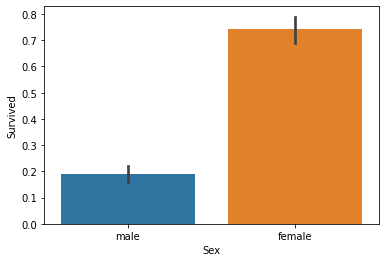

In [32]:
# Seaborn 을 사용해 성별에 따른 생존자 수
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

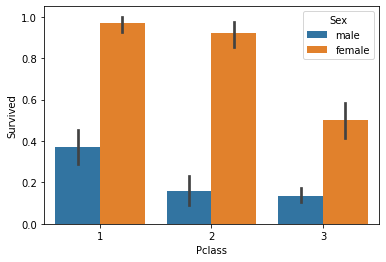

In [33]:
# 객실등급별 성별에 따른 생존 확률
sns.barplot(x='Pclass', y='Survived', hue= 'Sex', data = titanic_df) # 성별을 hue 로 색깔에 나타냄

- 이제 나이에 따른 생존자 수를 분석해볼 것임
- 나이의 경우 ==> 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당해야 함.

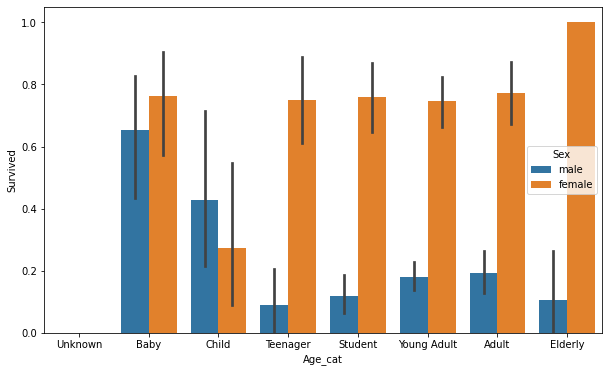

In [34]:
# Age 에 따라 카테고리로 분류해주는 함수
def get_category(age):
    cat=''
    if age<= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'

    return cat

# 막대 그래프의 크기 figure 을 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
# get_category(X) 는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data= titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis =1, inplace=True)

- 이제 생존자 수에 영향을 줄 수 있는 Sex, Age, PClass 등을 살펴보았음.
- 이제 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환.

<사이킷런 전처리 단계>
- 인코딩은 사이킷런의 LabelEncoder 클래스를 이용해 레이블 인코딩을 적용 ==> 카테고리 값의 유형에 따라 0~ n 의 숫자 지정.
- 다음으로 사이킷런의 전처리로, 모듈의 대부분 인코딩 API는 사이킷런의 기본 프레임워크 API 인 fit(), transform() 으로 데이터를 변환. 여러 칼럼을 encode_features() 함수를 새로 생성해 한번에 변환

In [35]:
# Sex, Cabin, Embarked 의 문자열 속성을 숫자열 속성으로 변환

from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


- 데이터의 전처리를 전체적으로 호출하는 함수인 transform_features()를 만들어 null 처리, 포매팅, 인코딩을 수행하게 만듦

In [36]:
# 전처리를 수행하는 함수들 미리 다 만들기
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace= True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature]) # fit() 시키기
        df[feature] = le.transform(df[feature]) # transform() 시키기
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

< 아래에서 할 데이터 예측 과정>

- 데이터 전처리를 수행하는 transform_features() 함수를 만들었으므로 이 함수를 이용해 다시 원본 데이터를 가공해봄.
- 원본 csv 파일을 다시 로딩하고, 타이타닉 생존자 데이터 세트의 레이블인 Survived 속성만 별도 분리해 클래스 결정값 데이터 세트로 만듦
- 그리고 Survived 를 드롭해 피처 데이터 세트를 만들겠음.
- 이렇게 생성된 피처 데이터 세트에 transform_features()를 적용해 데이터를 가공

In [37]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df = pd.read_csv(r'C:\Users\ADMIN\PycharmProjects\ESAA\data\titanic_train.csv')
y_titanic_df = titanic_df['Survived'] # 레이블 데이터 세트
X_titanic_df = titanic_df.drop('Survived', axis =1) # 학습(피처) 데이터 세트

X_titanic_df = transform_features(X_titanic_df) # null 제거, 불필요 속성 제거, 레이블 인코딩 진행

- 내려받은 학습 데이터 세트 X_titanic_df 를 기반으로 train_test_split() API 를 이용해 별도의 테스트 데이터 세트를 추출한다.
- 테스트 데이터 세트 크기는 전체의 20%

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

- 이제 ML 알고리즘인 결정트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 ==> 타이타닉 생존자 예측할 것
- 사이킷런은 결정 트리를 위해서 DecisionTreeClassifier, 랜덤 포레스트를 위해 RandomForestClassifier, 로지스틱 회귀를 위해 LogisticRegression 클래스를 제공한다.
- 이들 사이킷런 클래스를 이용해, train_test_split() 으로 분리한 학습 데이터와 테스트 데이터를 기반으로~
- 머신러닝 모델을 학습하고 (fit)
- 머신러닝 모델을 예측할 것이다 (predict)
- 예측 성능 평가는 정확도로 할 것이며, 이를 위해 accuracy_score() API 를 사용한다.
- DecisionTreeClassifier와 RandomForestClassifier에 생성 인자로 입력된 random_state =11 은 예제를 수행할 때 마다 같은 결과를 만들기 위해 넣은 것으로, 실제 예제에서는 제거해도 됨

In [39]:
# 데이터 예측 시작 with 결정 트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
df_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionForestClassifier 학습/예측/평가
df_clf.fit(X_train, y_train)
df_pred = df_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:4f}'.format(accuracy_score(y_test, df_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:4f}'.format(accuracy_score(y_test, lr_pred)))

RandomForestClassifier 정확도 : 0.787709
RandomForestClassifier 정확도 : 0.854749
RandomForestClassifier 정확도 : 0.849162


c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


- 3개의 알고리즘 중 LogisticRegression 이 가장 높은 정확도를 보임. But 아직 최적화 x, 데이터 양 충분 x 이므로 어떤 알고리즘이 가장 성능이 좋다 평가 불가.
- 이제는 교차 검증으로 결정 트리 모델을 좀 더 평가해보겠음.
- 교차 검증을 위해서 사이킷런 model_selection 패키지의 KFold 클래스, cross_val_score(), GridSearchCV 클래스를 모두 사용.

In [42]:
# KFold 클래스로 교차 검증 수행, 폴드 개수는 5개 선정

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 kfold 객체 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold= KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:4f}'.format(iter_count, accuracy))

    # 5개 fold 에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print('평균 정확도: {0:4f}'.format(mean_score))

# exec_kfold 호출
exec_kfold(df_clf, folds =5)

교차 검증 0 정확도: 0.754190
교차 검증 1 정확도: 0.780899
교차 검증 2 정확도: 0.786517
교차 검증 3 정확도: 0.769663
교차 검증 4 정확도: 0.820225
평균 정확도: 0.782299


In [43]:
# cross_val_score() 을 사용해 교차 검증 수행

from sklearn.model_selection import cross_val_score

scores = cross_val_score(df_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:4f}'.format(iter_count, accuracy))

print('평균 정확도 : {0:4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.743017
교차 검증 1 정확도 : 0.775281
교차 검증 2 정확도 : 0.792135
교차 검증 3 정확도 : 0.786517
교차 검증 4 정확도 : 0.842697
평균 정확도 : 0.787929


- cross_val_score() 와 k 폴드의 평균 정확도가 다른 이유는, cross_val_score() 가 stratifiedkfold 로 폴드세트를 분할하기 때문
- 마지막으로 GridsearchCV 로 예측해보겠음.
- cv 는 5개의 폴드 세트를 지정하고 하이퍼 파라미터는 max_depth, min_samples_split, min_samples_leaf 를 변경하며 성능 측정.
- 최적 하이퍼 파라미터와 그때의 예측을 출력하고, 최적 하이퍼 파라미터로 학습된 Estimator 를 이용해 위의 train_test_split()으로 분리된 테스트 데이터 세트에 예측을 수행해 예측 정확도를 출력하겠다.

In [45]:
# GridSearchCV 로 예측

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(df_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridearchCV 의 최적 하이퍼 파라미터로 학습된 Estimator 로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.799183
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.871508


- 정확도 향상됨. 하이퍼 파라미터 변경전보다 약 8% 상승. 근데 왜 그렇냐면 데스트용 데이터가 많이 작아서 그럼.